## Elastic Net

ElasticNet是一个使用L1和L2范数作为正则器的线性回归模型。这种组合允许学习稀疏模型，需要满足的条件是：很少有像Lasso那样的非零权值，同时仍然保持Ridge的正则化特性。我们利用l1_ratio参数来控制L1和L2的凸组合。

当多个特征相互关联时，Elastic Net是有用的。Lasso很可能随机挑选其中一个，而Elastic-Net可能两者都有。Lasso和Ridge之间进行权衡的优势是允许Elastic Net在旋转时继承Ridge的一些稳定特性。
用来最小化的方程如下所示：
【插入图片1】

ElasticNetCV类可以用来通过交叉验证设置alpha和l1_ratio参数。

## Example：Lasso and Elastic Net



Computing regularization path using the lasso...
Computing regularization path using the positive lasso...
Computing regularization path using the elastic net...
Computing regularization path using the positive elastic net...


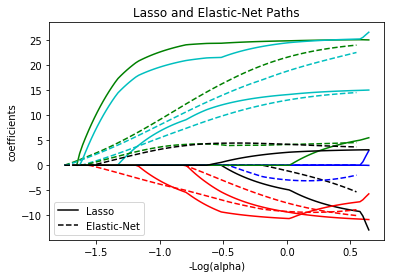

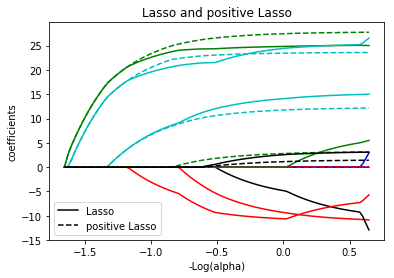

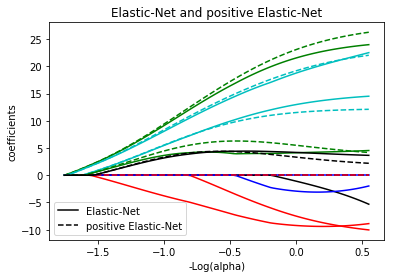

In [1]:
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import lasso_path, enet_path
from sklearn import datasets

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

X /= X.std(axis=0) # 标准化数据

# Compute paths
eps = 5e-3 # the smaller it is the longer is the path
print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps, fit_intercept=False)
print("Computing regularization path using the positive lasso...")
alphas_positive_lasso, coefs_positive_lasso, _ = lasso_path(X, y, eps, positive=True, fit_intercept=False)
print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = enet_path(X, y, eps=eps, l1_ratio=0.8, fit_intercept=False)

print("Computing regularization path using the positive elastic net...")
alphas_positive_enet, coefs_positive_enet, _ = enet_path(X, y, eps=eps, l1_ratio=0.8, positive=True, fit_intercept=False)

# Display results
plt.figure(1)
ax = plt.gca()
colors = cycle(['b', 'r', 'g', 'c', 'k'])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
neg_log_alphas_enet = -np.log10(alphas_enet)
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
	l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
	l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle='--', c=c)
plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and Elastic-Net Paths')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc='lower left')
plt.axis('tight')

plt.figure(2)
ax = plt.gca()
neg_log_alphas_positive_lasso = -np.log10(alphas_positive_lasso)

for coef_l, coef_pl, c in zip(coefs_lasso, coefs_positive_lasso, colors):
	l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
	l2 = plt.plot(neg_log_alphas_positive_lasso, coef_pl, linestyle='--', c=c)
plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and positive Lasso')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'positive Lasso'), loc='lower left')
plt.axis('tight')

plt.figure(3)
ax = plt.gca()
neg_log_alphas_positive_enet = -np.log10(alphas_positive_enet)
for (coef_e, coef_pe, c) in zip(coefs_enet, coefs_positive_enet, colors):
	l1 = plt.plot(neg_log_alphas_enet, coef_e, c=c)
	l2 = plt.plot(neg_log_alphas_positive_enet, coef_pe, linestyle='--', c=c)
plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Elastic-Net and positive Elastic-Net')
plt.legend((l1[-1], l2[-1]), ('Elastic-Net', 'positive Elastic-Net'),loc='lower left')
plt.axis('tight')
plt.show()

## Multi-task Elastic Net

MultiTaskElasticNet是一个elastic-net模型，为多重回归问题预测稀疏系数：Y是一个2D矩阵，形状为(n_samples,n_tasks)。同Multi-task Lasso一样，对于所有的回归问题或者回归任务来说，选定的特征需要是一样的。
从数学上将，它的表达式是这样的：
【插入图片2】

同样是使用坐标下降法作为算法来拟合系数的。
MultiTaskElasticNetCV类可以用来交叉验证设置参数alpha和l1_ratio。

